# Taylor series

**Import Libraries**

In [3]:
from matplotlib import style
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import sympy as sp
import numpy as np

In [5]:
from sympy.plotting import plot

In [132]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 14, 8
style.use('ggplot')

**Plotting in SymPy**

In [99]:
x=sp.symbols('x')

In [100]:
expr = x**4 - 4*x**3 + 4*x**2 - 2*x + 3
expr

x**4 - 4*x**3 + 4*x**2 - 2*x + 3

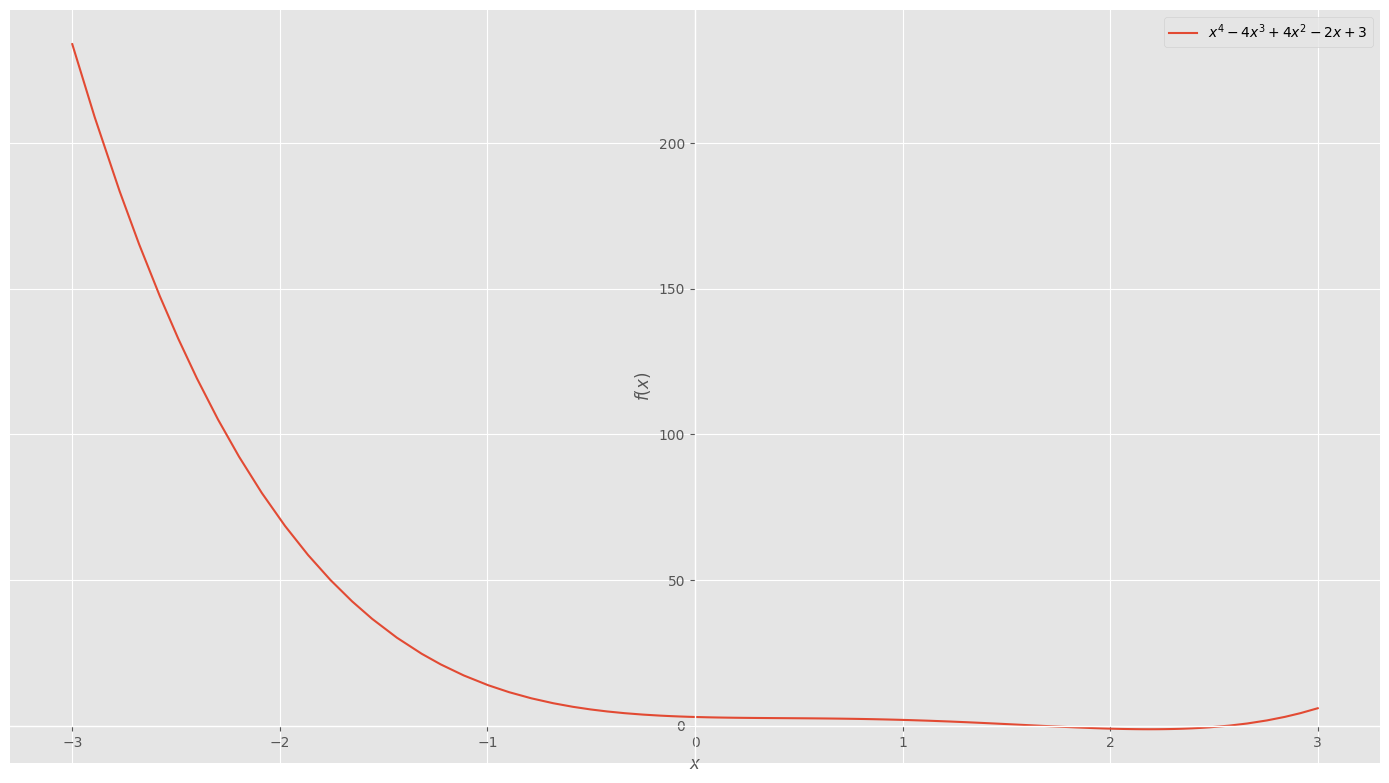

In [133]:
plot(expr,(x,-3,3),legend=True)

In [109]:
f = sp.sin(x)
f

sin(x)

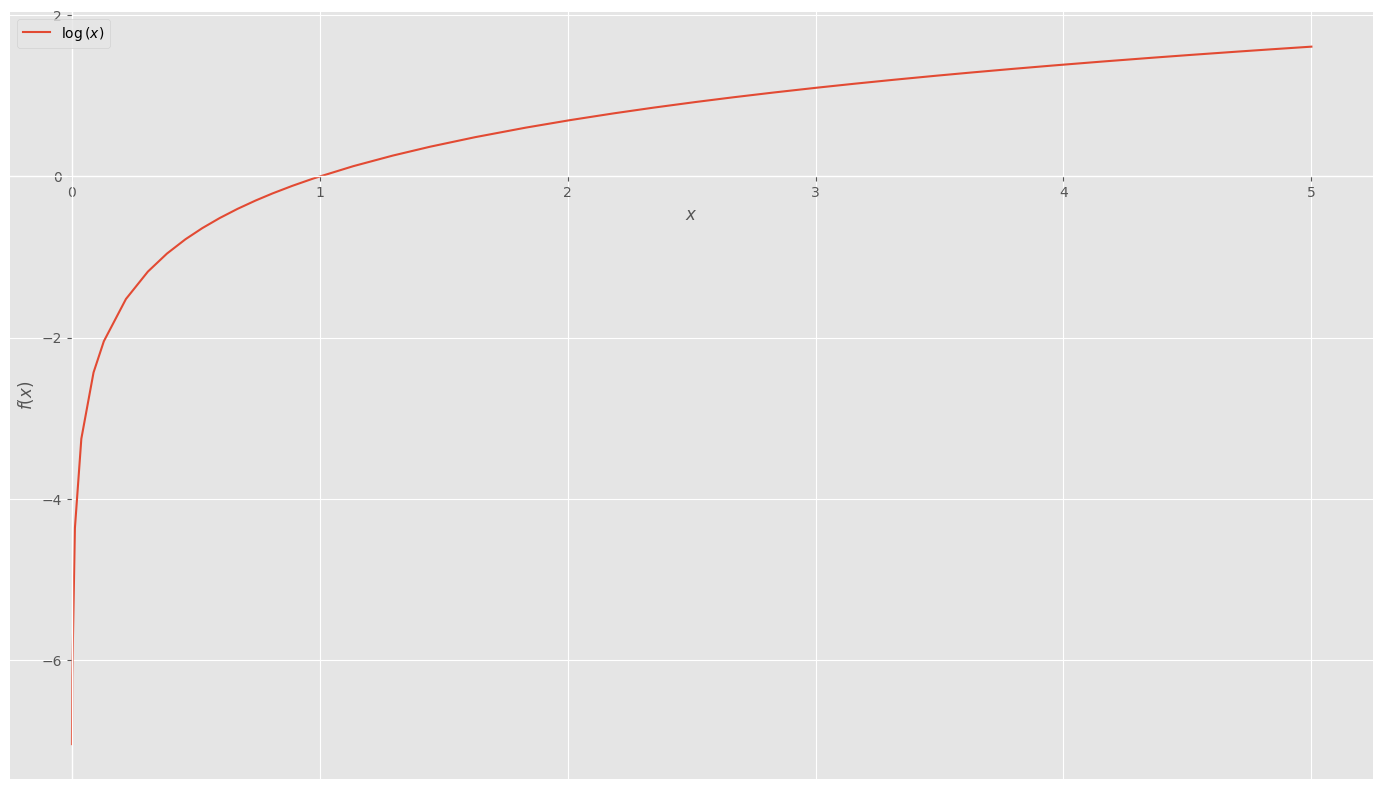

In [139]:
plot(f,(x,-5,5),legend=True)

## Taylor series expansion

In [119]:
f = sp.cos(x)

In [120]:
a=0
n=8
tay_f = sp.series(f,x,a,n)
tay_f

1 - x**2/2 + x**4/24 - x**6/720 + O(x**8)

In [121]:
tay_fs=tay_f.removeO()
tay_fs

-x**6/720 + x**4/24 - x**2/2 + 1

In [122]:
tay_fo=tay_f.getO()
tay_fo

O(x**8)

## Taylor series visualization

In [155]:
x=sp.symbols('x')

In [165]:
def taylor_approximation(f,a=0, n=3,spread=3):
    tay_f = sp.series(f,x,a,n)
    tay_fs=tay_f.removeO()
    
    p1 = plot(f,(x,a-spread-1,a+spread+1), show=False)
    p2 = plot(tay_fs,(x,a-spread,a+spread), show=False)
    p1.append(p2[0])
    p1.show()

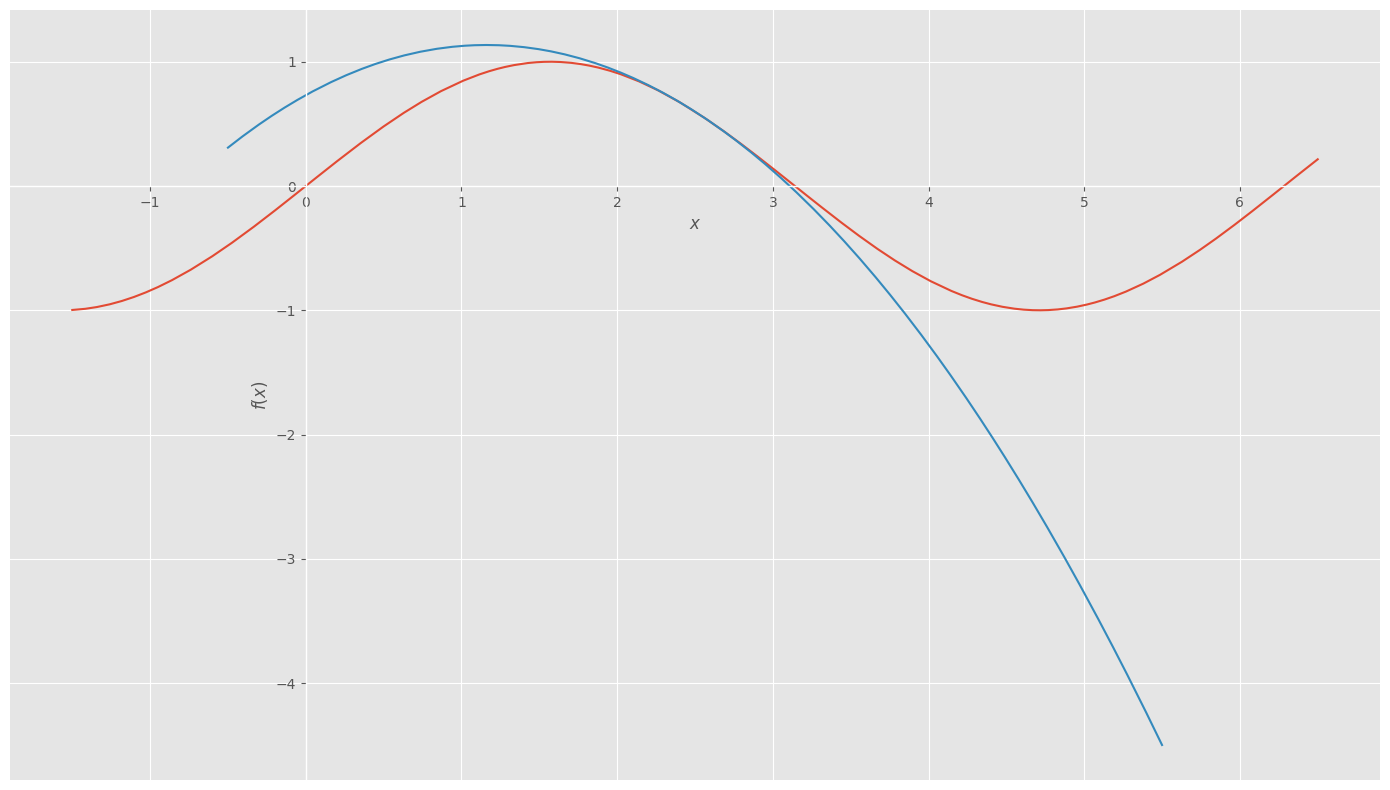

In [166]:
f =sp.sin(x)
taylor_approximation(f,a=2.5,n=3)

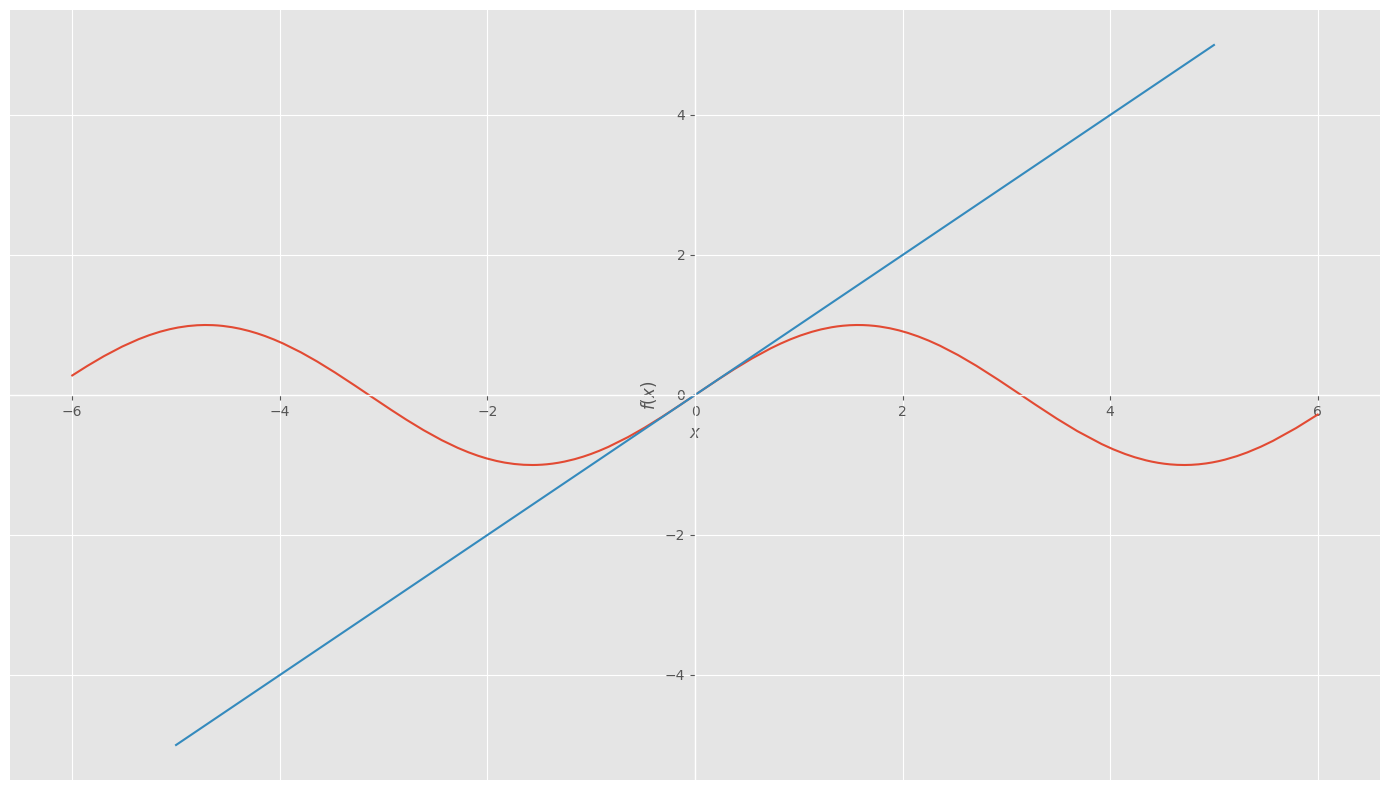

In [167]:
taylor_approximation(f,a=0,n=3,spread=5)

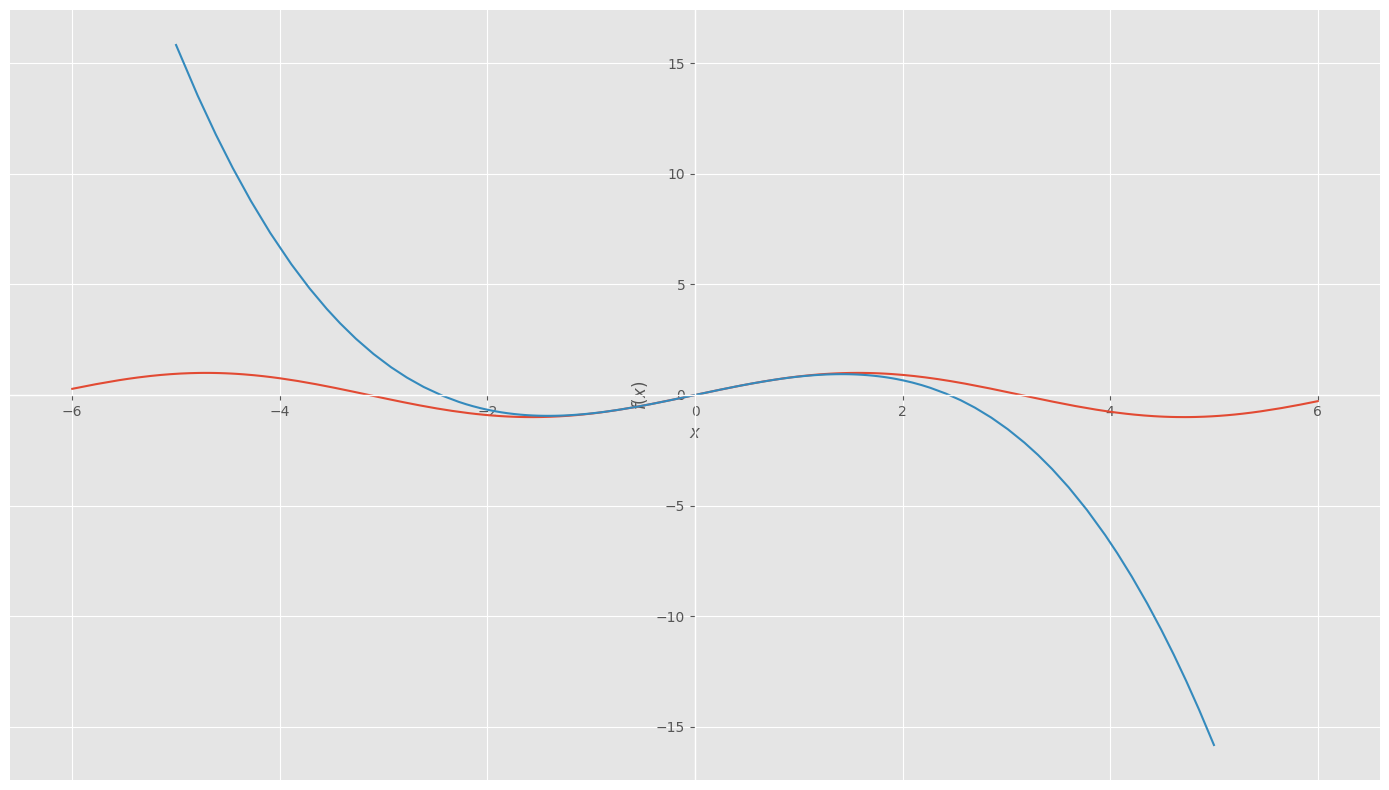

In [168]:
taylor_approximation(f,a=0,n=5,spread=5)

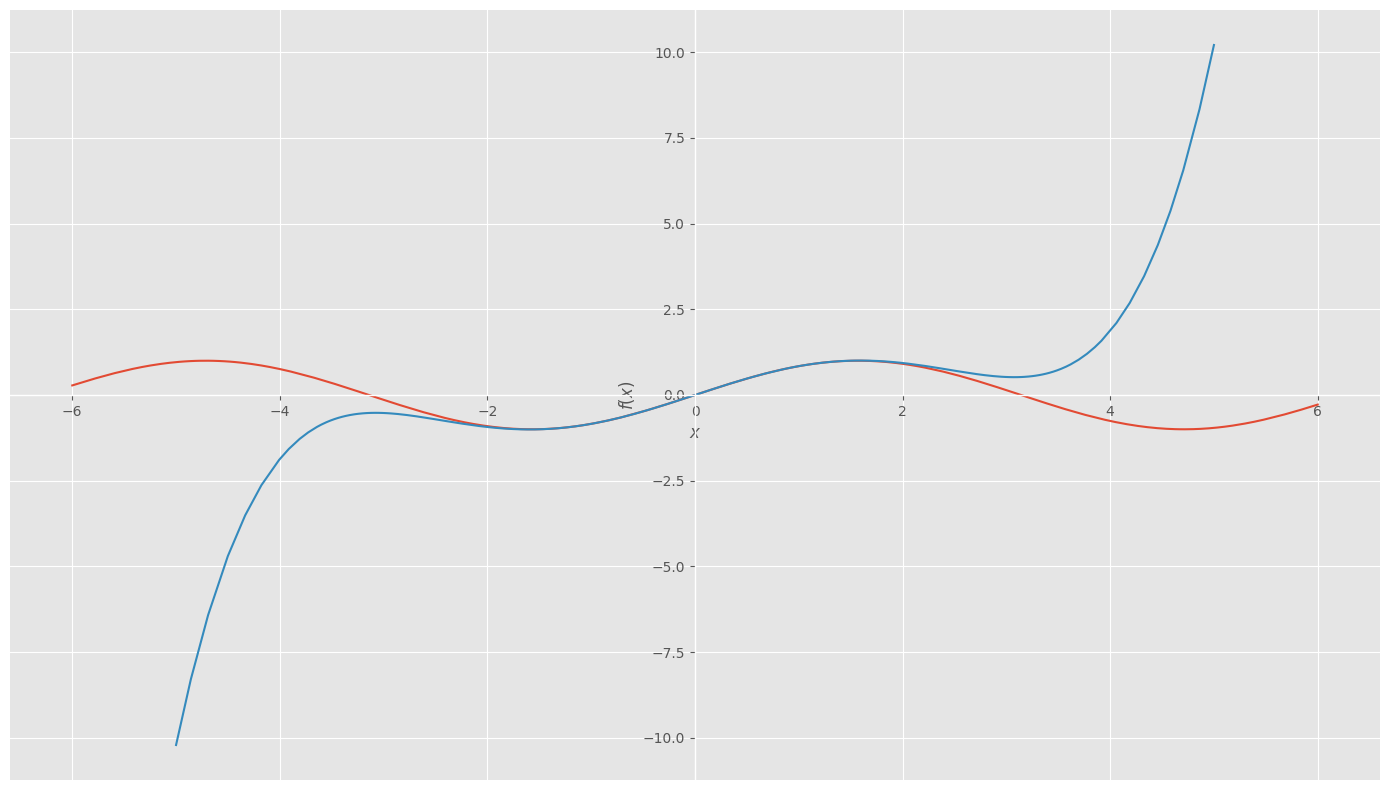

In [169]:
taylor_approximation(f,a=0,n=7,spread=5)

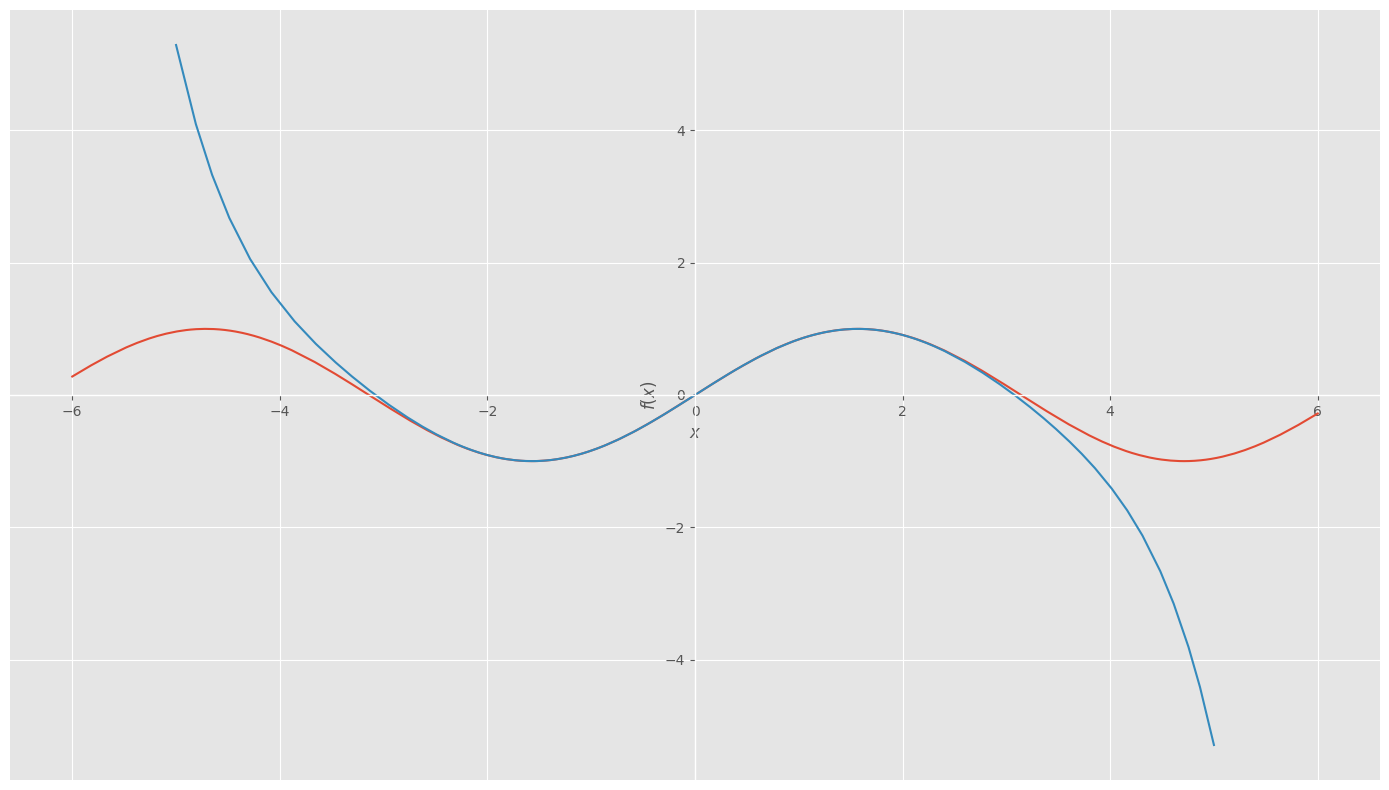

In [170]:
taylor_approximation(f,a=0,n=9,spread=5)

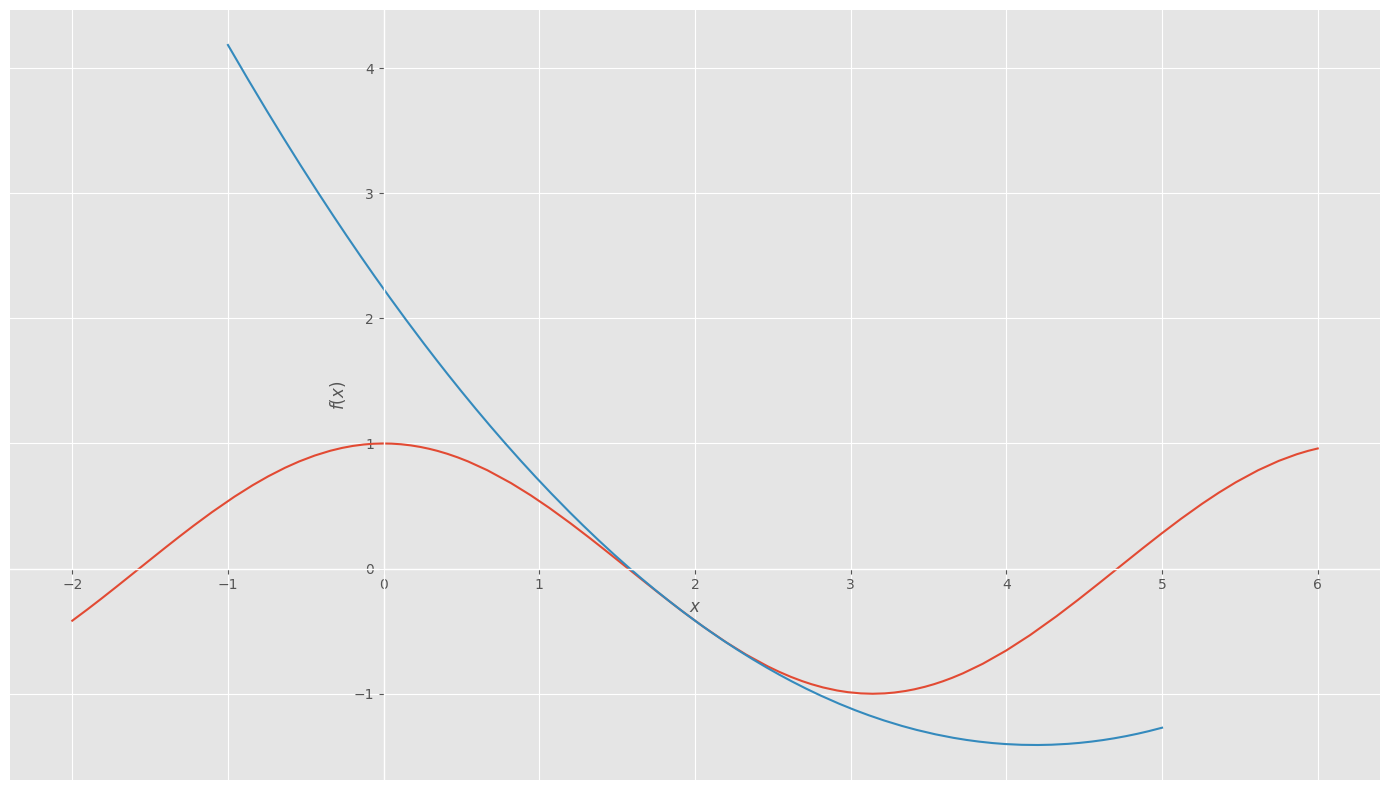

In [171]:
f =sp.cos(x)
taylor_approximation(f,a=2,n=3)

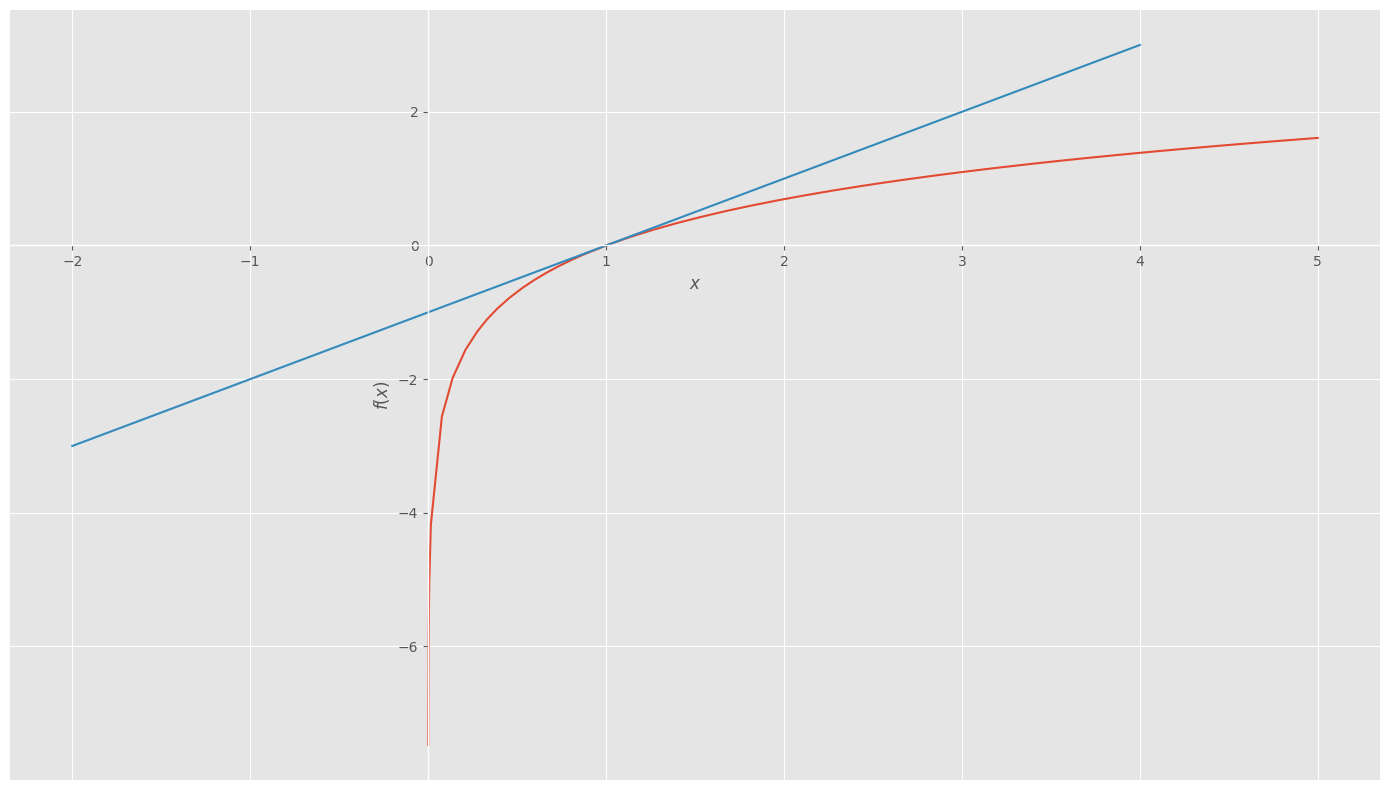

In [175]:
f = sp.log(x)
taylor_approximation(f,a=1,n=2)